In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# sample dataset
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", None, "Jake"],
    "Age": [25, 35, 45, 29, None, 33, 55, 31, 27, 30],
    "Salary": [50000, 60000, 75000, None, 52000, 48000, 88000, 58000, None, 62000],
    "Department": ["HR", "Finance", "IT", "HR", "Finance", None, "IT", "HR", "IT", "Finance"]
}

# Converting to a DataFrame
df = pd.DataFrame(data)
print(df)

      Name   Age   Salary Department
0    Alice  25.0  50000.0         HR
1      Bob  35.0  60000.0    Finance
2  Charlie  45.0  75000.0         IT
3    David  29.0      NaN         HR
4      Eve   NaN  52000.0    Finance
5    Frank  33.0  48000.0       None
6    Grace  55.0  88000.0         IT
7   Hannah  31.0  58000.0         HR
8     None  27.0      NaN         IT
9     Jake  30.0  62000.0    Finance


In [2]:
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(10, 4)


In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        9 non-null      object 
 1   Age         9 non-null      float64
 2   Salary      8 non-null      float64
 3   Department  9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
None


In [4]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
             Age        Salary
count   9.000000      8.000000
mean   34.444444  61625.000000
std     9.632122  13647.998283
min    25.000000  48000.000000
25%    29.000000  51500.000000
50%    31.000000  59000.000000
75%    35.000000  65250.000000
max    55.000000  88000.000000


In [5]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Name          1
Age           1
Salary        2
Department    1
dtype: int64


In [6]:
# Imputation is the process of handling missing values by replacing them with estimated values.
# Imputation is a data preprocessing technique used to handle missing (null) values in a dataset by 
# replacing them with estimated or meaningful values instead of removing the rows or columns entirely. 
# This approach helps retain the data's structure and avoids losing potentially valuable information.

In [7]:
# Handling Null Values
# numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
#you can use median also depedning on the data distribution

In [8]:
# categorical column
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

## Finding and Handling Outliers
Outliers are extreme values in a dataset that deviate significantly from the rest of the data. 
They can affect the analysis and model accuracy, so handling them is crucial. 
There are two common methods to handle outliers: IQR Method and Z-Score Method (Standard Score).

## When to Use Which Method?
Symmetrically Distributed Data (Normal Distribution): Use the Z-Score Method because it is based on the mean 
and standard deviation, which are appropriate for symmetric data.
Skewed Data or Non-Normal Distribution: Use the IQR Method as 
it relies on the median and quartiles, which are more robust to skewness and extreme values.

In [9]:
# Detecting Outliers Using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
      Name   Age   Salary Department
2  Charlie  45.0  75000.0         IT
6    Grace  55.0  88000.0         IT


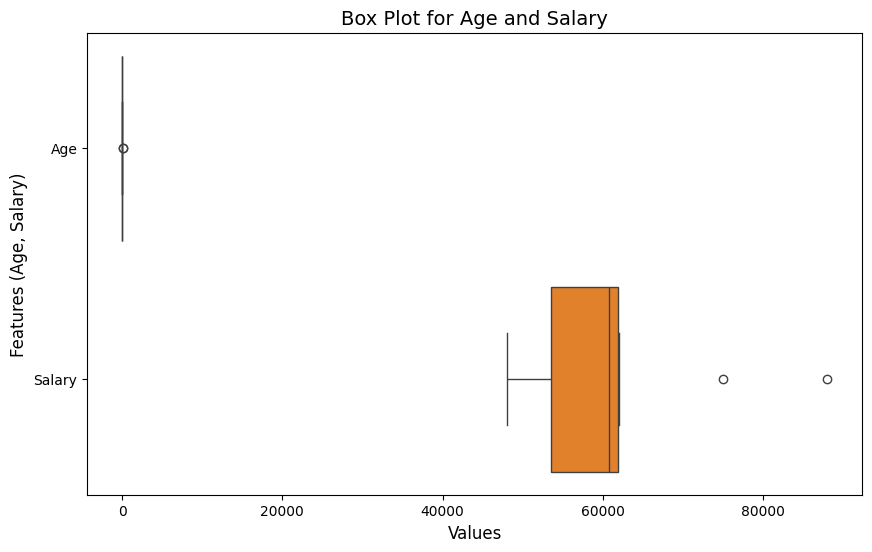

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the Box Plot for Age and Salary
plt.figure(figsize=(10, 6))

# Box plot for Age and Salary (excluding NaN values)
sns.boxplot(data=df[['Age', 'Salary']], orient='h')

# Adding title and labels
plt.title('Box Plot for Age and Salary', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features (Age, Salary)', fontsize=12)

# Display the plot
plt.show()

In [11]:
# Handle Outliers

In [12]:
# Option 1: Remove rows with outliers:
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

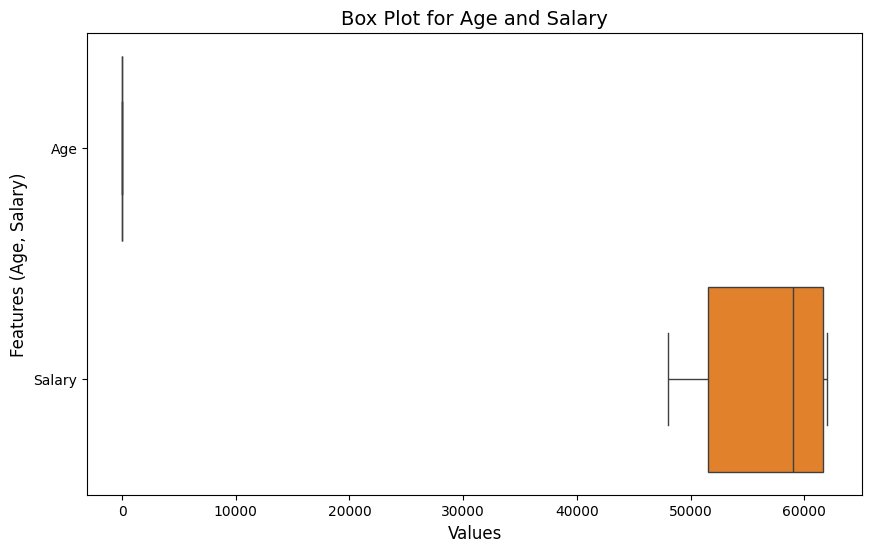

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the Box Plot for Age and Salary
plt.figure(figsize=(10, 6))

# Box plot for Age and Salary (excluding NaN values)
sns.boxplot(data=df[['Age', 'Salary']], orient='h')

# Adding title and labels
plt.title('Box Plot for Age and Salary', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features (Age, Salary)', fontsize=12)

# Display the plot
plt.show()

In [14]:
#  # Z-score method for detecting outliers:
# import numpy as np
# # Calculate the Z-score for 'Salary' column
# df['Z_score'] = (df['Salary'] - df['Salary'].mean()) / df['Salary'].std()

# # Define threshold (typically 3 or -3)
# threshold = 3

# # Find outliers
# outliers = df[(df['Z_score'] > threshold) | (df['Z_score'] < -threshold)]

# print("Outliers:")
# print(outliers)

In [15]:
# # Removing Outliers Using Z-Score
# # Remove outliers
# df_cleaned = df[(df['Z_score'] <= threshold) & (df['Z_score'] >= -threshold)]

# # Drop the Z-score column as it's no longer needed
# df_cleaned = df_cleaned.drop(columns=['Z_score'])

# print("Data after removing outliers:")
# print(df_cleaned)


In [16]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plotting the Box Plot for Age and Salary
# plt.figure(figsize=(10, 6))

# # Box plot for Age and Salary (excluding NaN values)
# sns.boxplot(data=df[['Age', 'Salary']], orient='h')

# # Adding title and labels
# plt.title('Box Plot for Age and Salary', fontsize=14)
# plt.xlabel('Values', fontsize=12)
# plt.ylabel('Features (Age, Salary)', fontsize=12)

# # Display the plot
# plt.show()

In [17]:
# The Z-score is calculated using the formula:
# 𝑍 = (𝑋 − mean)/ standard deviation
 
# Any value with a Z-score > 3 or < -3 is considered an outlier.
# Outliers are then removed to get the cleaned dataset.

Capping (or winsorization). Capping replaces extreme outlier values with a predefined threshold, such as a certain percentile (e.g., 1st and 99th percentiles).

In [18]:
# import pandas as pd

# # Sample dataset
# data = {
#     "Name": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", None, "Jake"],
#     "Age": [25, 35, 45, 29, None, 33, 55, 31, 27, 30],
#     "Salary": [50000, 60000, 75000, None, 52000, 48000, 88000, 58000, None, 62000],
#     "Department": ["HR", "Finance", "IT", "HR", "Finance", None, "IT", "HR", "IT", "Finance"]
# }

# # Converting to DataFrame
# df = pd.DataFrame(data)

# # Handling missing values (replacing None with NaN)
# df = df.apply(pd.to_numeric, errors='coerce')

# # Function to cap outliers
# def cap_outliers(df, column):
#     # Calculate the lower and upper percentiles (1st and 99th)
#     lower_bound = df[column].quantile(0.01)
#     upper_bound = df[column].quantile(0.99)
    
#     # Capping the outliers
#     df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
#     return df

# # Capping outliers in 'Age' and 'Salary' columns
# df = cap_outliers(df, 'Age')
# df = cap_outliers(df, 'Salary')

# # Display the DataFrame after capping outliers
# print(df)

In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plotting the Box Plot for Age and Salary
# plt.figure(figsize=(10, 6))

# # Box plot for Age and Salary (excluding NaN values)
# sns.boxplot(data=df[['Age', 'Salary']], orient='h')

# # Adding title and labels
# plt.title('Box Plot for Age and Salary', fontsize=14)
# plt.xlabel('Values', fontsize=12)
# plt.ylabel('Features (Age, Salary)', fontsize=12)

# # Display the plot
# plt.show()

In [20]:
print("Cleaned Dataset:")
print(df)

Cleaned Dataset:
     Name        Age   Salary Department
0   Alice  25.000000  50000.0         HR
1     Bob  35.000000  60000.0    Finance
3   David  29.000000  61625.0         HR
4     Eve  34.444444  52000.0    Finance
5   Frank  33.000000  48000.0    Finance
7  Hannah  31.000000  58000.0         HR
8    None  27.000000  61625.0         IT
9    Jake  30.000000  62000.0    Finance


-- The end --